In [1]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   252 non-null    int64  
 1   Month                  252 non-null    object 
 2   Date                   252 non-null    object 
 3   Population (million)   252 non-null    float64
 4   Temperature (celsius)  252 non-null    float64
 5   CPI                    252 non-null    float64
 6   GDP (million bahts)    252 non-null    float64
 7   Peak Load (MW)         252 non-null    float64
 8   Generation (GWh)       252 non-null    float64
 9   Consumption (GWh)      252 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.8+ KB


In [3]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,65.85,27.35,98.58,928734.67,27423.0
1,66.04,25.89,110.54,861770.33,32254.5
2,63.68,26.01,89.20,664313.33,20708.2
3,63.09,26.58,70.07,470404.67,16293.1
4,63.17,26.66,82.40,603354.33,19695.7


In [4]:
X = df.drop('Peak Load (MW)', axis=1).values
y = df['Peak Load (MW)'].values

X.shape, y.shape

((252, 4), (252,))

In [5]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 4), (12, 4), (240,), (12,))

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')])

rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=3000, batch_size=32, validation_split=0.2)

Epoch 1/3000
6/6 [==============================] - 1s 30ms/step - loss: 564746880.0000 - root_mean_squared_error: 23764.4043 - val_loss: 541914432.0000 - val_root_mean_squared_error: 23279.0547
Epoch 2/3000
6/6 [==============================] - 0s 10ms/step - loss: 564727872.0000 - root_mean_squared_error: 23764.0039 - val_loss: 541894976.0000 - val_root_mean_squared_error: 23278.6387
Epoch 3/3000
6/6 [==============================] - 0s 10ms/step - loss: 564708352.0000 - root_mean_squared_error: 23763.5938 - val_loss: 541873984.0000 - val_root_mean_squared_error: 23278.1875
Epoch 4/3000
6/6 [==============================] - 0s 13ms/step - loss: 564686912.0000 - root_mean_squared_error: 23763.1426 - val_loss: 541850432.0000 - val_root_mean_squared_error: 23277.6816
Epoch 5/3000
6/6 [==============================] - 0s 9ms/step - loss: 564662592.0000 - root_mean_squared_error: 23762.6309 - val_loss: 541823296.0000 - val_root_mean_squared_error: 23277.0977
Epoch 6/3000
6/6 [========

In [16]:
import tensorflow as tf

tf.keras.models.save_model(model, 'ANN_tf_model')

INFO:tensorflow:Assets written to: ANN_tf_model\assets


INFO:tensorflow:Assets written to: ANN_tf_model\assets


In [17]:
model = tf.keras.models.load_model('ANN_tf_model')

In [18]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 105ms/step - loss: 1222872.2500 - mae: 923.9592
Test loss: [1222872.25, 923.9591674804688]


1/1 [==============================] - 0s 61ms/step


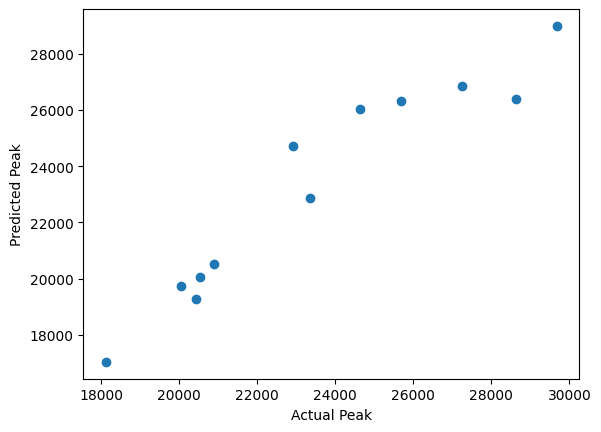

In [19]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(1222873.4890983521,
 1105.8361040852085,
 923.9594531249995,
 0.17863494055853135)